In [1]:
import numpy as np
import pandas as pd

In [2]:
import matplotlib.pyplot as plt

To display plot outputs inside the notebook itself (and not in the separate viewer), enter the following magic statement

In [3]:
%matplotlib inline

Reading csv file by using pandas _read_csv_ method

We will learn Matplotlib by visualizing this dataset _countries.csv_

In [4]:
df = pd.read_csv('countries.csv')

Exploring Data

In [5]:
df.describe()

,year,lifeExpectancy,population,gdpPerCapita
count,1704.00000,1704.000000,1.704000e+03,1704.000000
mean,1979.50000,59.474439,2.960121e+07,7215.327081
std,17.26533,12.917107,1.061579e+08,9857.454543
min,1952.00000,23.599000,6.001100e+04,241.165877
25%,1965.75000,48.198000,2.793664e+06,1202.060309
50%,1979.50000,60.712500,7.023596e+06,3531.846989
75%,1993.25000,70.845500,1.958522e+07,9325.462346
max,2007.00000,82.603000,1.318683e+09,113523.132900


In [6]:
df.describe(include='all')

,country,continent,year,lifeExpectancy,population,gdpPerCapita
count,1704,1704,1704.00000,1704.000000,1.704000e+03,1704.000000
unique,142,5,NaN,NaN,NaN,NaN
top,Czech Republic,Africa,NaN,NaN,NaN,NaN
freq,12,624,NaN,NaN,NaN,NaN
mean,NaN,NaN,1979.50000,59.474439,2.960121e+07,7215.327081
std,NaN,NaN,17.26533,12.917107,1.061579e+08,9857.454543
min,NaN,NaN,1952.00000,23.599000,6.001100e+04,241.165877
25%,NaN,NaN,1965.75000,48.198000,2.793664e+06,1202.060309
50%,NaN,NaN,1979.50000,60.712500,7.023596e+06,3531.846989
75%,NaN,NaN,1993.25000,70.845500,1.958522e+07,9325.462346


In [7]:
df.head()

,country,continent,year,lifeExpectancy,population,gdpPerCapita
0,Afghanistan,Asia,1952,28.801,8425333,779.445314
1,Afghanistan,Asia,1957,30.332,9240934,820.853030
2,Afghanistan,Asia,1962,31.997,10267083,853.100710
3,Afghanistan,Asia,1967,34.020,11537966,836.197138
4,Afghanistan,Asia,1972,36.088,13079460,739.981106


Gives a sample from the dataframe

In [8]:
df.sample(5)

,country,continent,year,lifeExpectancy,population,gdpPerCapita
110,Belgium,Europe,1962,70.250,9218400,10991.206760
542,Gabon,Africa,1962,40.489,455661,6631.459222
78,Austria,Europe,1982,73.180,7574613,21597.083620
1603,United Kingdom,Europe,1987,75.007,56981620,21664.787670
1596,United Kingdom,Europe,1952,69.180,50430000,9979.508487


# Stateful Versus Stateless Approach

Everything in matplotlib is organized in a hierarchy. At the top of the hierarchy is the matplotlib “state-machine environment” which is provided by the matplotlib.pyplot module. At this level, simple functions are used to add plot elements (lines, images, text, etc.) to the current axes in the current figure.

The next level down in the hierarchy is the first level of the object-oriented interface, in which pyplot is used only for a few functions such as figure creation, and the user explicitly creates and keeps track of the figure and axes objects. At this level, the user uses pyplot to create figures, and through those figures, one or more axes objects can be created. These axes objects are then used for most plotting actions.

For even more control – which is essential for things like embedding matplotlib plots in GUI applications – the pyplot level may be dropped completely, leaving a purely object-oriented approach.

### Pyplot

Pyplot provides the state-machine interface to the underlying object-oriented plotting library. The state-machine implicitly and automatically creates figures and axes to achieve the desired plot

The first call to plt.plot will automatically create the necessary figure and axes to achieve the desired plot. Subsequent calls to plt.plot re-use the current axes and each add another line. Setting the title, legend, and axis labels also automatically use the current axes and set the title, create the legend, and label the axis respectively.

__Pyplot Stateful Approach__

In this approach you can see that we did not make any instance of figure or axis class. Pyplot took care of this for us.

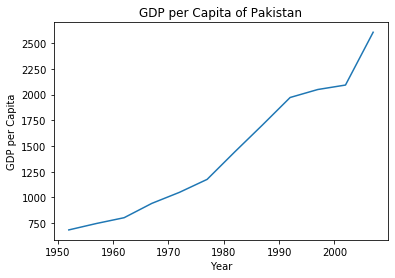

In [10]:
pak = df[df['country'] == 'Pakistan']

plt.plot(pak['year'], pak['gdpPerCapita'])

plt.title("GDP per Capita of Pakistan")
plt.xlabel("Year")
plt.ylabel("GDP per Capita")

plt.show()

We can see that this approach is very easy to use and understand

## Stateful Vs Stateless

__Stateful__ :  State-based, State-machine
__Stateless__ :  Object-Oriented interfaces.

Above, we used import matplotlib.pyplot as plt to import the pyplot module from matplotlib and name it plt.

Almost all functions from pyplot, such as plt.plot(), are implicitly either referring to an existing current Figure and current Axes, or creating them anew if none exist. Hidden in the matplotlib docs is this helpful snippet:

_"In pyplot, simple functions are used to add plot elements (lines, images, text, etc.) to the current axes in the current figure."_

The stateful interface makes its calls with plt.plot() and other top-level pyplot functions. There is only ever one Figure or Axes that you’re manipulating at a given time, and you don’t need to explicitly refer to it.
Modifying the underlying objects directly is the object-oriented approach. We usually do this by calling methods of an Axes object, which is the object that represents a plot itself.

__Suggested Approach__

For non-interactive plotting it is suggested to use pyplot to create the figures and then the OO interface for plotting.

Text(0, 0.5, 'GDP per Capita')

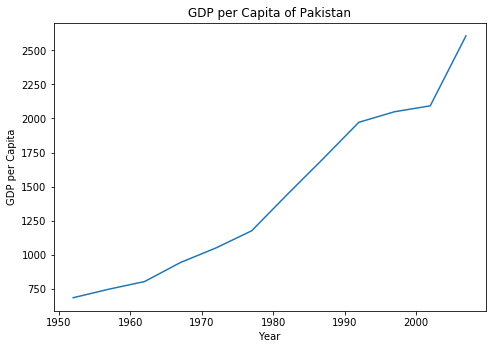

In [12]:
pak = df[df['country'] == 'Pakistan']

fig = plt.figure()

ax = fig.add_axes([0,0,1,1])

ax.plot(pak['year'], pak['gdpPerCapita'])

ax.set_title("GDP per Capita of Pakistan")
ax.set_xlabel("Year")
ax.set_ylabel("GDP per Capita")

So, why all the extra typing instead of the MATLAB-style (which relies on global state and a flat namespace)? For very simple things like this example, the only advantage is academic: the wordier styles are more explicit, more clear as to where things come from and what is going on. For more complicated applications, this explicitness and clarity becomes increasingly valuable, and the richer and more complete object-oriented interface will likely make the program easier to write and maintain.